In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

#Picking random samples from different data sets. 
#Limited to 4500 samples due to processing

df2 = pd.read_csv('1.csv')
df2=df2.sample(500)

df3 = pd.read_csv('2.csv')
df3 = df3.sample(500)

df4 = pd.read_csv('3.csv')
df4 = df4.sample(500)

df5 = pd.read_csv('4.csv')
df5 = df5.sample(500)

df6 = pd.read_csv('5.csv')
df6 = df6.sample(500)

df7 = pd.read_csv('6.csv')
df7 = df7.sample(500)

df8 = pd.read_csv('7.csv')
df8 = df8.sample(500)

df9 = pd.read_csv('8.csv')
df9 = df9.sample(500)

df10 = pd.read_csv('10.csv')
df10 = df10.sample(500)

df = [df2, df3, df4, df5, df6, df7, df8, df9, df10]
df = pd.concat(df)

df.columns




Index(['time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z'],
      dtype='object')

## Linear Regression

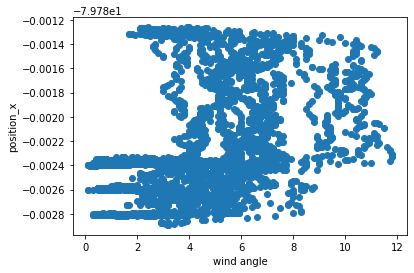

In [3]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('position_x')
plt.scatter(df.wind_speed,df.position_x)

In [4]:
reg_x = linear_model.LinearRegression()
reg_x.fit(df[['wind_speed']], df.position_x)

LinearRegression()

In [5]:
print(reg_x.predict(np.array([11]).reshape(1,1)))

print(reg_x.predict(np.array([9]).reshape(1,1)))

print(reg_x.predict(np.array([2]).reshape(1,1)))

[-79.7817145]
[-79.78188614]
[-79.78248687]


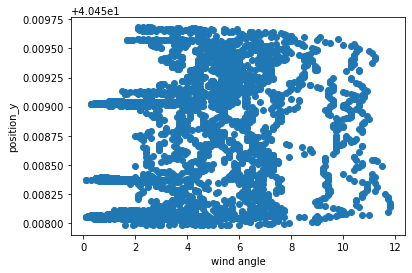

In [6]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('position_y')
plt.scatter(df.wind_speed,df.position_y)

In [7]:
reg_y = linear_model.LinearRegression()
reg_y.fit(df[['wind_speed']], df.position_y)

LinearRegression()

In [8]:
print(reg_y.predict(np.array([11]).reshape(1,1)))

print(reg_y.predict(np.array([9]).reshape(1,1)))

print(reg_y.predict(np.array([2]).reshape(1,1)))

[40.45914659]
[40.45901833]
[40.45856943]


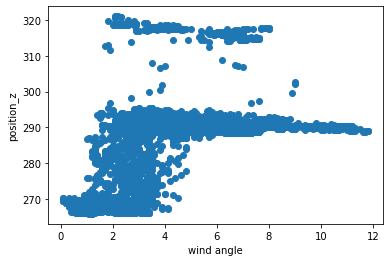

In [9]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('position_z')
plt.scatter(df.wind_speed,df.position_z)

In [10]:
reg_z = linear_model.LinearRegression()
reg_z.fit(df[['wind_speed']], df.position_z)

LinearRegression()

In [11]:
print(reg_z.predict(np.array([11]).reshape(1,1)))

print(reg_z.predict(np.array([9]).reshape(1,1)))

print(reg_z.predict(np.array([2]).reshape(1,1)))

[305.06939036]
[299.17150812]
[278.52892028]


## Support Vector Machine

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df.columns

Index(['time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z'],
      dtype='object')

In [13]:
position_x = df.drop(['position_x'], axis=1)
Y1 = df['position_x']
position_x_train, position_x_test, Y1_train, Y1_test = train_test_split(position_x, Y1, test_size=0.33)

position_y = df.drop(['position_y'], axis=1)
Y2 = df['position_y']
position_y_train, position_y_test, Y2_train, Y2_test = train_test_split(position_y, Y2, test_size=0.33)

position_z = df.drop(['position_z'], axis=1)
Y3 = df['position_z']
position_z_train, position_z_test, Y3_train, Y3_test = train_test_split(position_z, Y3, test_size=0.33)

In [19]:
#clfx = SVC(kernel='linear')
#clfx.fit(position_x_train, Y1_train.astype('int'))

In [16]:
#np.unique(Y1_train.astype('int')) 

#Position x and y do not change much, so when converting to int, it yields the same result for the entire column

array([-79])

In [24]:
#clfy = SVC(kernel='linear')
#clfy.fit(position_y_train, Y2_train.astype('int'))


In [21]:
clfz = SVC(kernel='linear')
clfz.fit(position_z_train, Y3_train.astype('int'))

SVC(kernel='linear')

In [22]:
#Y1_pred = clfz.predict(position_x_test)
#Y2_pred = clfy.predict(position_y_test)
Y3_pred = clfz.predict(position_z_test)

In [25]:
print(classification_report(Y3_test.astype('int'), Y3_pred))

              precision    recall  f1-score   support

         265       0.00      0.00      0.00         8
         266       0.71      0.87      0.78        99
         267       0.67      0.46      0.55        89
         268       0.57      0.72      0.64       149
         269       0.14      0.07      0.10        40
         270       0.16      0.19      0.17        21
         271       0.00      0.00      0.00        15
         272       0.00      0.00      0.00        12
         273       0.07      0.09      0.08        11
         274       0.11      0.08      0.09        13
         275       0.10      0.25      0.14         8
         276       0.00      0.00      0.00        13
         277       0.00      0.00      0.00        15
         278       0.04      0.06      0.05        16
         279       0.25      0.11      0.15         9
         280       0.00      0.00      0.00         5
         281       0.00      0.00      0.00         7
         282       0.00    